<a href="https://colab.research.google.com/github/deetee67/deetee67/blob/main/Final_Capstonever3x_Python_Project_DMcKinney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final - Capstone Python Project - D.McKinney


---


**Dataset** - IT Salary Survey in Europe 2020

**Research Question** - Is there a difference in average salary between male and female employees in the Information Technology  Industryin Europe. What impact, if any, does Age or Experience have on Salary amount.


---


**Null hypothesis** – There is no significant difference in average salary between males and females.

**H0**: There is no significant difference in average salary between males and females


**H0**: µ1 = µ2 (the two population (male and female) means are equal)

**Alternative hypothesis**  – There is a significant difference in average salary between males and females

**HA**: There is a significant difference in average salary between males and females

**HA**: µ1 ≠ µ2 (the two population (male and female) means are not equal)

**Assumptions** 

- 1: The two samples are independent
- 2: The two samples have the same variances (Homogeneity of Variance).


#Step 1* - Load Libraries

In [573]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm
import statistics
import missingno as msno
import datetime as dt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', -1)

#Step 2* - Load dataset - IT Salary Survey EU 2020

In [574]:
df = pd.read_csv('/content/sample_data/IT Salary Survey EU  2020 (1).csv')

#Step 3* - Explore data
**Shape, Head, Tail, datatypes, empty cells**

In [575]:
df.shape

(1253, 23)

In [576]:
df.head(2)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:33:51,66.0,Male,Munich,Software Engineer,40.0,4.0,Lead,ruby on rails,"Javascript / Typescript, Ruby, SQL",70000.0,NaN,50000.0,NaN,30,Full-time employee,Unlimited contract,German,51-100,Product,No,0.0,NaN
1,6/12/2020 21:51,69.0,Male,Stuttgart,Rentner,38.0,3.0,Head,NaN,NaN,70000.0,NaN,NaN,NaN,NaN,NaN,NaN,German,Nov-50,Consulting / Agency,No,NaN,NaN


In [577]:
df.tail(2)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1251,8/1/2021 16:12,52.0,Male,Stuttgart,Software Engineer,NaN,30.0,Lead,Atlassian JIRA,"SQL, Perl",100000.0,NaN,NaN,NaN,NaN,Self-employed (freelancer),Temporary contract,English,up to 10,Consulting / Agency,No,NaN,NaN
1252,25/11/2020 21:10:17,37.0,Male,Stuttgart,Backend Developer,NaN,NaN,Senior,C#,NaN,70000.0,NaN,NaN,NaN,30,Full-time employee,Unlimited contract,NaN,NaN,NaN,No,NaN,NaN


In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [579]:
# Identifying missing values in dataset
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

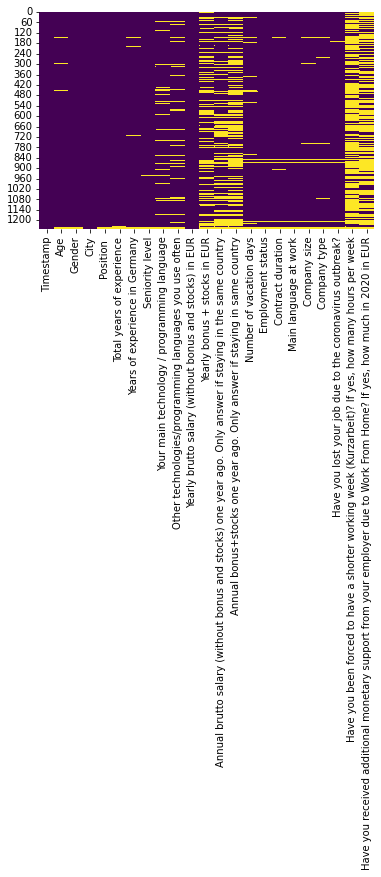

In [580]:
#Showing a heat map of missing values - shows exactly where missing values are in dataset
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

#Step 4* - Data Cleaning
Imputation & Transformation
Dropping columns, Renaming Columns, Filling/ replacing empty values with mean numbers and strings ('Missing Value')
Converting datatypes from object/ category to float or int
Convert date time

In [581]:
# Remove some contigous columns
df.drop(df.iloc[:, 11:23], inplace = True, axis = 1)
# Remove other 1 other column
df.drop(df.columns[[9]], axis = 1, inplace = True)

In [582]:
#Renaming columns
df.rename(columns = {'Your main technology / programming language':'Technology', 'Total years of experience':'Work Experience', 'Years of experience in Germany': 'Germany Work Experience'}, inplace=True)
df.rename(columns = {'Yearly brutto salary (without bonus and stocks) in EUR':'Annual Salary'}, inplace=True)

In [583]:
#Converting data types
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Work Experience'] = pd.to_numeric(df['Work Experience'],errors = 'coerce')
df['Germany Work Experience'] = pd.to_numeric(df['Germany Work Experience'],errors = 'coerce')

In [584]:
# Replace empty cells in e.g. in columns 'Technology' and OtherTech' column with string 'missing value' 
#Replace number values with the column mean
df['Technology'].fillna("Missing Value", inplace = True)
df['Age'].fillna(32, inplace=True)
df['Gender'].fillna("Male", inplace=True)
df['Seniority level'].fillna("Missing Value", inplace=True)
df['Work Experience'].fillna(9, inplace=True)
df['Germany Work Experience'].fillna(4, inplace=True)

In [585]:
#Converting data types
df['Age'].astype(int)
df['Germany Work Experience'].astype(int)
df['Work Experience'].astype(int)
df.head(2)

,Timestamp,Age,Gender,City,Position,Work Experience,Germany Work Experience,Seniority level,Technology,Annual Salary
0,2020-11-24 11:33:51,66.0,Male,Munich,Software Engineer,40.0,4.0,Lead,ruby on rails,70000.0
1,2020-06-12 21:51:00,69.0,Male,Stuttgart,Rentner,38.0,3.0,Head,Missing Value,70000.0


In [586]:
#Checking new shape of dataset after columns dropped
df.shape

(1253, 10)

#Step 5 * - Summary Statistics and Visualization

**Explore** - Mode, Mean, Max of  cleaned dataset (1253 rows) - selected 10 cols


---
**Prepare Visualizations to Show**
- Distribution of Age
- Distribution of City
- Distribution of Annual Salary (Mean/ Median/ Outliers) using ViolinPlot, BoxPlots by Gender
---
**Subset data** - 10% of population = approx. 125 rows IT employees


In [587]:
#Show data statistics on Gender grouping
df.groupby('Gender').agg([np.mean, np.median, np.max])

Age  \
              mean   
Gender               
Diverse  27.500000   
Female   31.265625   
Male     32.731822   

                \
        median   
Gender           
Diverse   27.5   
Female    31.0   
Male      32.0   

               \
         amax   
Gender          
Diverse  33.0   
Female   45.0   
Male     69.0   

        Work Experience  \
                   mean   
Gender                    
Diverse        1.000000   
Female         6.322917   
Male           9.250803   

                \
        median   
Gender           
Diverse    1.0   
Female     6.0   
Male       9.0   

               \
         amax   
Gender          
Diverse   1.0   
Female   20.0   
Male     40.0   

        Germany Work Experience  \
                           mean   
Gender                            
Diverse                3.500000   
Female                 3.063281   
Male                   3.895042   

                \
        median   
Gender           
Diverse    3.5   
Female     2.0   
Male       3.0   

               \
         amax   
Gender          
Diverse   6.0   
Female   13.0   
Male     30.0   

        Annual Salary  \
                 mean   
Gender                  
Diverse  1.445000e+05   
Female   2.662480e+06   
Male     9.450251e+07   

                   \
           median   
Gender              
Diverse  144500.0   
Female    60000.0   
Male      70000.0   

                       
                 amax  
Gender                 
Diverse  1.590000e+05  
Female   5.000000e+08  
Male     1.000000e+11

In [588]:
#Show mode of the datasset
df.mode(numeric_only=True)

,Age,Work Experience,Germany Work Experience,Annual Salary
0,32.0,5.0,2.0,60000.0


In [589]:
print(df['Gender'].value_counts().sort_index(ascending=True))

Diverse       2
Female      192
Male       1059
Name: Gender, dtype: int64


In [590]:
#Show max, mean, min, percentile of the datasset
df.describe()

,Age,Work Experience,Germany Work Experience,Annual Salary
count,1253.000000,1253.000000,1253.000000,1.253000e+03
mean,32.498803,8.788986,3.766959,8.027904e+07
std,5.602890,5.299586,3.582062,2.825061e+09
min,20.000000,0.000000,0.000000,1.000100e+04
25%,29.000000,5.000000,1.000000,5.880000e+04
50%,32.000000,8.000000,3.000000,7.000000e+04
75%,35.000000,12.000000,5.000000,8.000000e+04
max,69.000000,40.000000,30.000000,1.000000e+11


***Selecting a subset of the dataset or a SAMPLE of the data population ***

*   approximately 10% of dataset - 1253 rows --> 125 Male/ Female


---





In [591]:
#Random Sample
df2=df.sample(125)

In [592]:
#Show stats on the sample
df2.describe()

,Age,Work Experience,Germany Work Experience,Annual Salary
count,125.000000,125.00000,125.000000,125.000000
mean,31.840000,8.29440,3.629600,69834.241040
std,4.869921,4.90803,2.796225,24474.369481
min,23.000000,0.80000,0.000000,10001.000000
25%,28.000000,5.00000,2.000000,57600.000000
50%,32.000000,7.00000,3.000000,70000.000000
75%,34.000000,11.00000,5.000000,80000.000000
max,48.000000,25.00000,18.000000,180000.000000


In [593]:
#Show stats - max, mean, median on subset/ sample
df2.groupby('Gender').agg([np.mean, np.median, np.max])

Age  \
             mean   
Gender              
Female  32.047619   
Male    31.798077   

               \
       median   
Gender          
Female   31.0   
Male     32.0   

              \
        amax   
Gender         
Female  42.0   
Male    48.0   

       Work Experience  \
                  mean   
Gender                   
Female        4.952381   
Male          8.969231   

               \
       median   
Gender          
Female    5.0   
Male      9.0   

              \
        amax   
Gender         
Female  10.0   
Male    25.0   

       Germany Work Experience  \
                          mean   
Gender                           
Female                2.690476   
Male                  3.819231   

               \
       median   
Gender          
Female   3.00   
Male     3.25   

              \
        amax   
Gender         
Female   7.0   
Male    18.0   

       Annual Salary  \
                mean   
Gender                 
Female  57028.571429   
Male    72420.001250   

                 \
         median   
Gender            
Female  56000.0   
Male    70000.0   

                  
            amax  
Gender            
Female   86000.0  
Male    180000.0

In [594]:
#setting up seaborn color palette for visualizations
color = ["green", "blue", "red"]
sns.set_palette(color)

**Visualizing the data:** - Shows Distribution of IT Professionals by Age and City 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

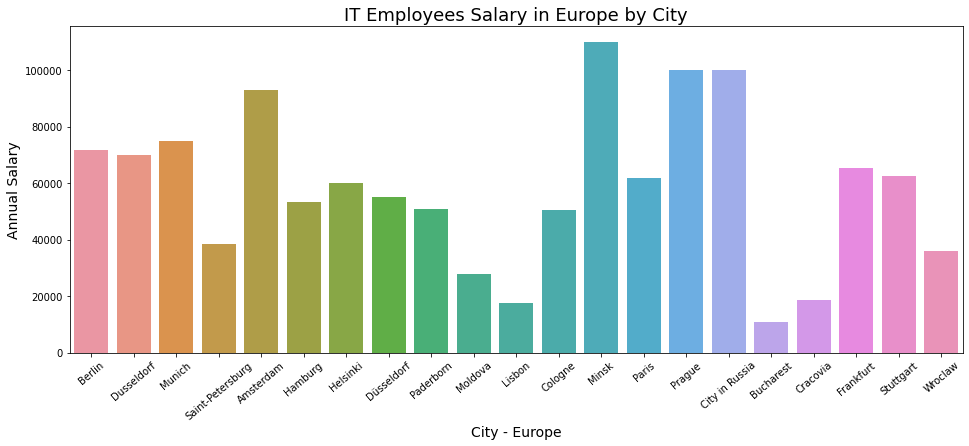

In [614]:
plt.figure(figsize=(16, 6))
sns.barplot(x="City", 
    y="Annual Salary",
    data=df2,
    ci=None, )
plt.ylabel("Annual Salary", size=14)
plt.xlabel("City - Europe", size=14)
plt.title("IT Employees Salary in Europe by City", size=18)
plt.xticks(rotation=40)

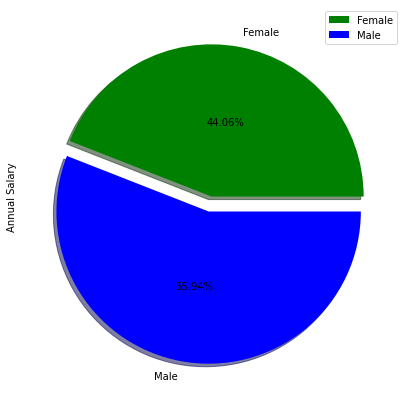

In [616]:
#groupby shows Mean Annual Salary of IT employees in Europe by Gender
pie, ax = plt.subplots(figsize=[14,7])
df2.groupby("Gender")["Annual Salary"].mean().plot.pie( explode = (0, 0.1), shadow=True, pctdistance=0.5, autopct="%.2f%%");
plt.legend()
plt.show()

#Visualizations (Violin & BoxPlot) 
Showing median of the sample of 125 records/ rows

- **Shows outliers, max, min**

- **Outliers identified on the Male Gender**

- **Median for Males is higher than females** 

Text(0, 0.5, 'Annual Salary')

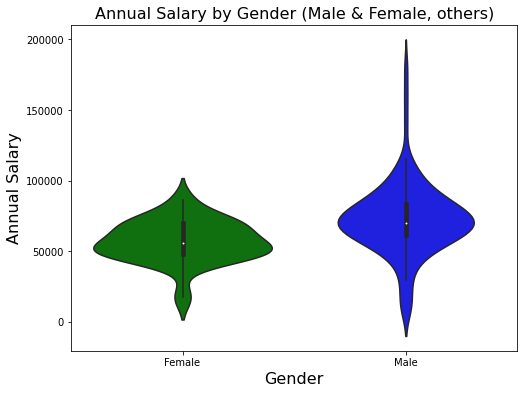

In [617]:
#violin Plot
plt.figure(figsize=[8,6])
sns.violinplot(x='Gender', y='Annual Salary', data=df2)
plt.title('Annual Salary by Gender (Male & Female, others)', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Annual Salary', fontsize=16)

Text(0, 0.5, 'Annual Salary')

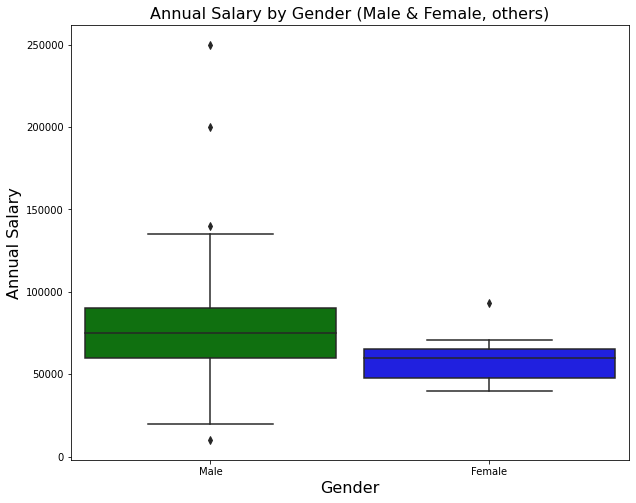

In [511]:
#Boxplots showing gender distribution of annual salary
plt.figure(figsize=[10,8])
sns.boxplot(x='Gender', y='Annual Salary', data=df2, width=.9)
plt.title('Annual Salary by Gender (Male & Female, others)', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Annual Salary', fontsize=16)

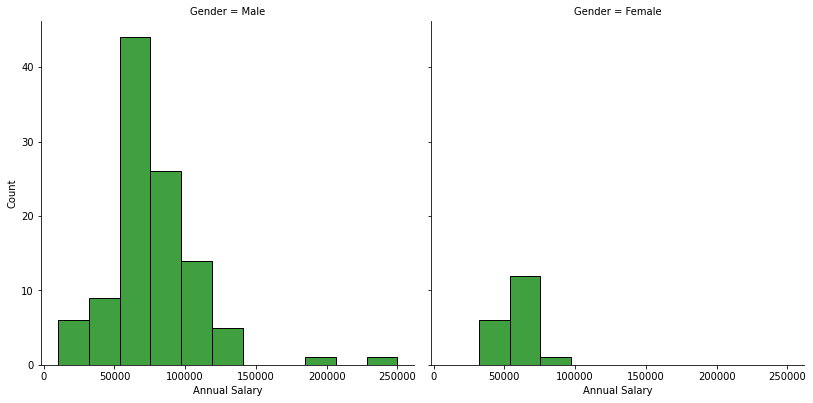

In [512]:
#Showing histogram of Annual Salary by Gender
#Shows significant difference in Male and Female Salary in the sample
sns.displot(df2, x="Annual Salary", col="Gender", bins=11, height=5.7)

Text(0, 0.5, 'Annual Salary')

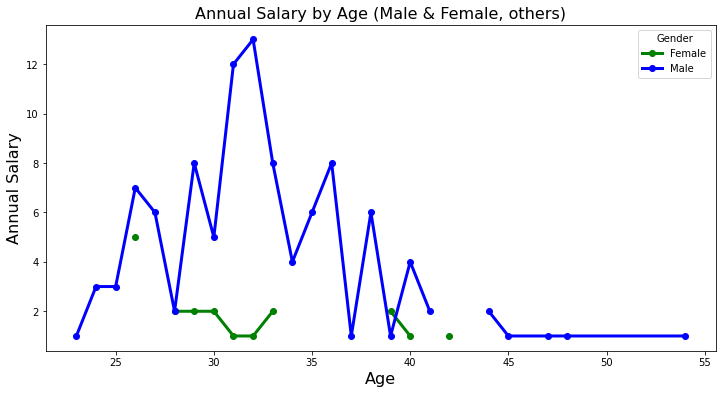

In [514]:
#This plot shows distribution of Annual Salary by Age and Gender
#It shows the significant variance between males and females in the sample
fig, ax = plt.subplots(figsize=(12,6))
df2.groupby(['Age','Gender']).count()['Annual Salary'].unstack().plot(ax=ax, marker='o', linewidth=3)
plt.title('Annual Salary by Age (Male & Female, others)', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Salary', fontsize=16)

Text(0.5, 1.0, 'IT Salary in Europe by Seniority')

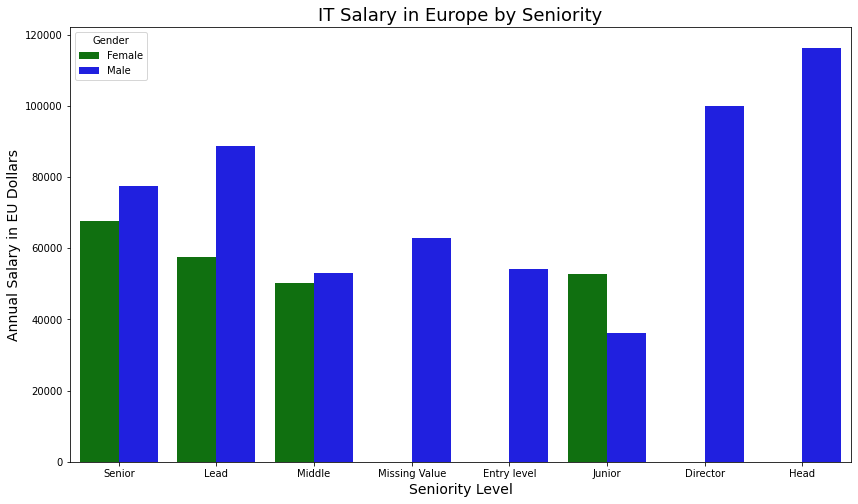

In [618]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Seniority level", 
    y="Annual Salary",
    data=df2,
    ci=None, hue="Gender" )
plt.ylabel("Annual Salary in EU Dollars", size=14)
plt.xlabel("Seniority Level", size=14)
plt.title("IT Salary in Europe by Seniority", size=18)

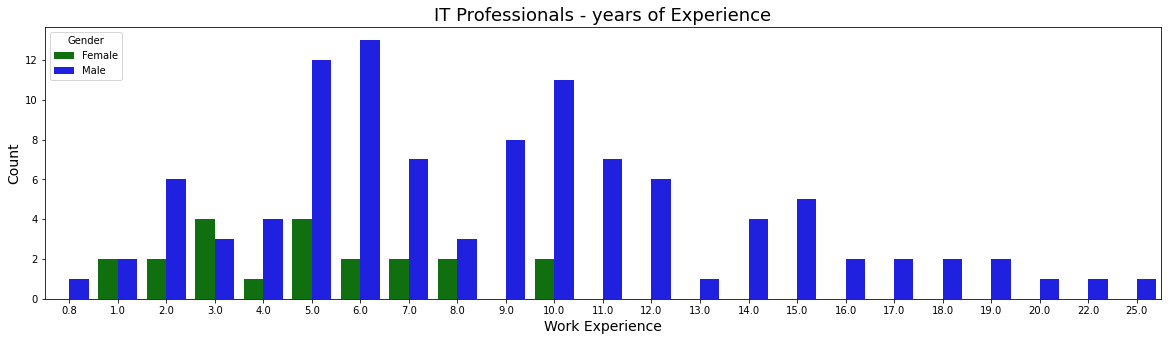

In [621]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Work Experience', hue="Gender", data=df2)
plt.title('IT Professionals - years of Experience', fontsize=18)
plt.ylabel("Count", size=14)
plt.xlabel("Work Experience", size=14)
plt.show()

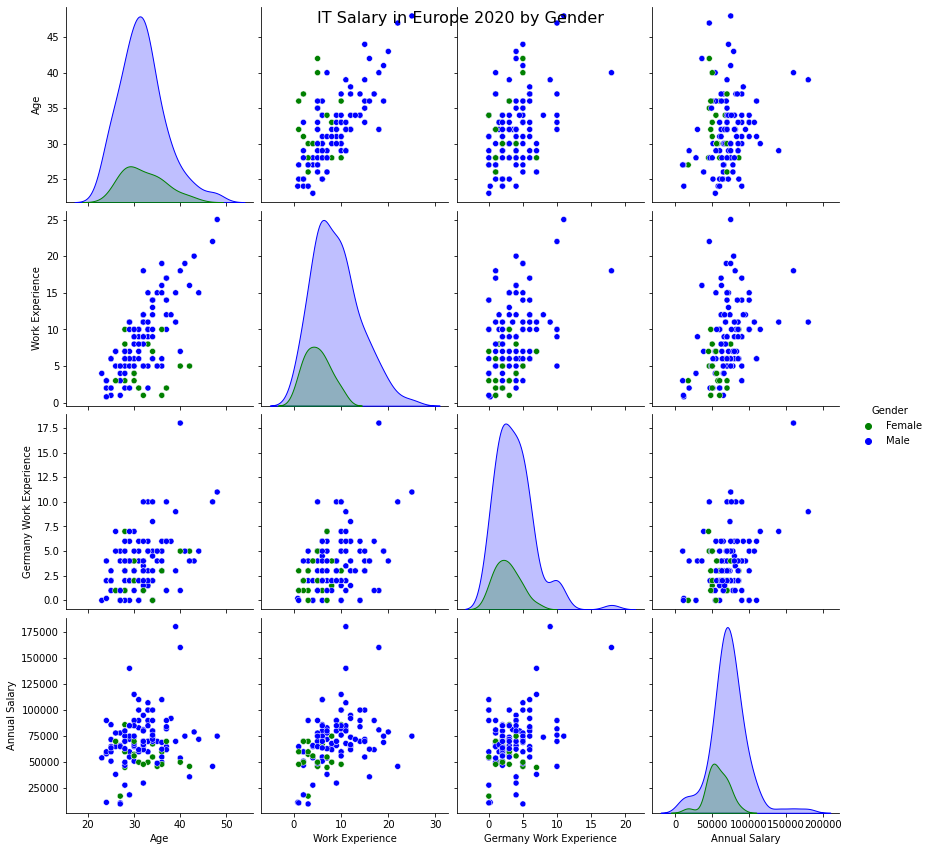

In [622]:
#Strong positive relationship between Age, Experience and Annual Salary overall data population
#Seaborn showing pairplot of the numeric columns subset in sample
from numpy.core.defchararray import center
sns.pairplot(df2,hue="Gender", height=3.)
plt.suptitle('IT Salary in Europe 2020 by Gender', fontsize=16, ha='center', va='top')
plt.show()

**#Creating the 2 Data Subsets 125 ( 2 separate Samples - Male/ Female)**

Used individual samples of 125 each because there is less than 200 Females in the full dataset - so to allow for random selection I used a lower number than 105 so that there could be adequate representation for both genders

In [623]:
Male_data = (df[df.Gender=='Male'])
dfMaleSample=Male_data.sample(125)
Female_data = (df[df.Gender=='Female'])
dfFemaleSample=Female_data.sample(125)


In [624]:
dfMaleSample.groupby('Gender').agg([np.min, np.max, np.mean, np.median ])

Age  \
        amin   
Gender         
Male    24.0   

              \
        amax   
Gender         
Male    48.0   

                \
          mean   
Gender           
Male    32.184   

               \
       median   
Gender          
Male     32.0   

       Work Experience  \
                  amin   
Gender                   
Male               2.0   

              \
        amax   
Gender         
Male    25.0   

               \
         mean   
Gender          
Male    8.928   

               \
       median   
Gender          
Male      8.0   

       Germany Work Experience  \
                          amin   
Gender                           
Male                       0.0   

              \
        amax   
Gender         
Male    14.0   

               \
         mean   
Gender          
Male    3.456   

               \
       median   
Gender          
Male      3.0   

       Annual Salary  \
                amin   
Gender                 
Male         13000.0   

                  \
            amax   
Gender             
Male    250000.0   

                  \
            mean   
Gender             
Male    74614.76   

                 
         median  
Gender           
Male    70000.0

In [625]:
dfMaleSample.describe()

,Age,Work Experience,Germany Work Experience,Annual Salary
count,125.000000,125.0000,125.00000,125.000000
mean,32.184000,8.9280,3.45600,74614.760000
std,4.625288,4.7318,2.85963,27615.225306
min,24.000000,2.0000,0.00000,13000.000000
25%,29.000000,5.0000,1.50000,60000.000000
50%,32.000000,8.0000,3.00000,70000.000000
75%,35.000000,12.0000,5.00000,82000.000000
max,48.000000,25.0000,14.00000,250000.000000


In [626]:
dfFemaleSample.groupby('Gender').agg([np.min, np.max, np.mean, np.median ])

Age  \
        amin   
Gender         
Female  21.0   

              \
        amax   
Gender         
Female  45.0   

                \
          mean   
Gender           
Female  30.872   

               \
       median   
Gender          
Female   30.0   

       Work Experience  \
                  amin   
Gender                   
Female             0.0   

              \
        amax   
Gender         
Female  20.0   

               \
         mean   
Gender          
Female  6.068   

               \
       median   
Gender          
Female    5.0   

       Germany Work Experience  \
                          amin   
Gender                           
Female                     0.0   

              \
        amax   
Gender         
Female  13.0   

              \
        mean   
Gender         
Female  2.97   

               \
       median   
Gender          
Female    2.0   

       Annual Salary  \
                amin   
Gender                 
Female       12000.0   

                     \
               amax   
Gender                
Female  500000000.0   

                    \
              mean   
Gender               
Female  4057325.44   

                 
         median  
Gender           
Female  58000.0

In [627]:
dfFemaleSample.describe()

,Age,Work Experience,Germany Work Experience,Annual Salary
count,125.00000,125.000000,125.000000,1.250000e+02
mean,30.87200,6.068000,2.970000,4.057325e+06
std,4.85429,3.834449,2.657081,4.471619e+07
min,21.00000,0.000000,0.000000,1.200000e+04
25%,28.00000,3.000000,1.000000,5.000000e+04
50%,30.00000,5.000000,2.000000,5.800000e+04
75%,33.00000,8.000000,4.000000,6.800000e+04
max,45.00000,20.000000,13.000000,5.000000e+08


Text(0, 0.5, 'Frequency')

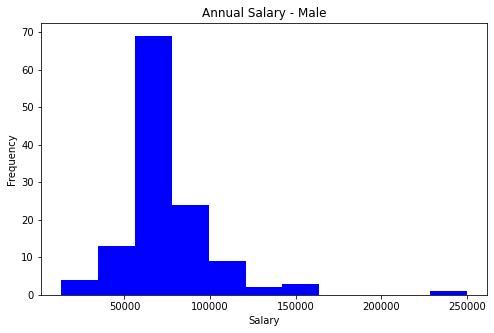

In [630]:
#HISTOGRAM - showing Male Annual Salary from Sample of 80 males
dfMaleSample.hist(column='Annual Salary', bins=11, color='blue', figsize=[8,5], grid=False)
plt.title('Annual Salary - Male')
plt.xlabel('Salary')
plt.ylabel('Frequency')

In [632]:
FINAL_Female_df=dfFemaleSample[["Annual Salary"]]
FINAL_Male_df=dfMaleSample[["Annual Salary"]]

**#Testing the - Homogeneity of Variance of the two sample groups (Male & Female - Annual Salary)**

The ratio of the larger sample variance to the smaller sample variance of Annual Salary is less than 4.
 

This means we can assume that the population variances are equal


---

**Therefore, we can proceed to perform the two sample t-test with equal variances:**

In [633]:
#Finding variance for each sample group (Male & Female - Annual Salary)
print(np.var(FINAL_Male_df), np.var(FINAL_Female_df))

Annual Salary    7.564999e+08
dtype: float64 Annual Salary    1.983542e+15
dtype: float64


In [634]:
#perform two sample t-test with equal variances - using Scipy -p-value < 0.05, Reject null Hypothesis
#The t test statistic is -0.6337 and the corresponding two-sided p-value is 0.53005.
stats.ttest_ind(a=FINAL_Male_df, b=FINAL_Female_df, equal_var=True)

Ttest_indResult(statistic=array([-0.99579251]), pvalue=array([0.32032157]))

The two hypotheses for this particular two sample t-test are as follows:

**H0**: µ1 = µ2 (the two population means are equal)

**HA**: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test result in the above cell is greater than **alpha = 0.05**, we fail to reject the null hypothesis of the test.
- Statistically, we **do not have sufficient evidence** to say that the mean Annual Salary between the two populations (amles/ female) is different.

#Summary - Insights
- **Positive** relationship betwee Age and Experience overall - the older you get, more experience, move up the ranks, increase salary
- **Males** - Show stronger positive relationship between Salary and Age as well as Salary and Experience than Females

- **Males** have more experience as they work longer in the industry - up to 66 years, so males have a greater opportunity to move up getting higher salaries (becoming outliers)
- **Females** make up approximately 20% of the general data survey population - this may be due to their late entry in the field and early exit.

- **Signficant** number of IT workers are employed in the larger cities in EUROPE e.g. Berlin, St. Petersburg, Munich
---

**Final Analysis**

Despite showing significant variance in mean of annual salary in some distributions, the **pvalue** showed otherwise - that based on this dataset or my samples there is no significant difference in average salary, so I fail to reject the null Hypothesis.